# Task 1.5: 20th Century Text Mining

## Import Libraries

In [1]:
# Import libraries
from textblob import TextBlob 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/emilycurcio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/emilycurcio/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/emilycurcio/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Load Data

In [2]:
# Import text file
myfile = open('20th_century_wiki.txt', encoding = 'utf-8')

In [3]:
with open('20th_century_wiki.txt', 'r', errors = 'ignore') as file:
    data = file.read().replace('\n', '')

## Tokenize Words

In [4]:
# Word tokenization
from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word[:5])

['Key', 'events', 'of', 'the', '20th']


In [5]:
# Create frequency distribution
from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 4888 samples and 20364 outcomes>


In [6]:
dist_words.most_common(10)

[('.', 1285),
 ('the', 1095),
 (',', 990),
 ('of', 604),
 ('and', 397),
 ('to', 325),
 ('[', 303),
 (']', 303),
 ('The', 302),
 ('in', 290)]

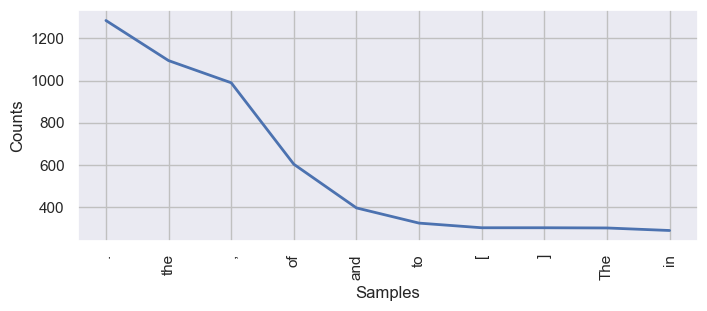

In [7]:
# Frequency distribution plot
plt.figure(figsize = (8, 3))
dist_words.plot(10, cumulative = False)
plt.show()

## Remove Stop Words and Punctuation Marks

In [8]:
# Defining stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [9]:
capitalized_stop_words = [word.capitalize() for word in stop_words]

In [10]:
all_stop_words = list(stop_words) + capitalized_stop_words

In [11]:
# Remove stop words
filtered_words = [] # creates an empty list
for word in tokenized_word:
    if word not in all_stop_words:
        filtered_words.append(word)

In [12]:
# Check
filtered_words[:5]

['Key', 'events', '20th', 'century', '-']

In [13]:
# Substitute all punctuations marks with a space 
sans_punc = re.sub('[^a-zA-Z]',     # Search for all non-letters
                   ' ',             # Replace all non-letters with spaces
                   str(filtered_words))

In [14]:
# Check
sans_punc[:25]

'  Key    events      th  '

In [15]:
# Word tokenization
tokenized_word_2 = word_tokenize(sans_punc)
print(tokenized_word_2[:5])

['Key', 'events', 'th', 'century', 'WikipediaJump']


In [16]:
# Create a new frequency distribution
dist_words_filter_2 = FreqDist(tokenized_word_2)

In [17]:
dist_words_filter_2.most_common(10)

[('Retrieved', 205),
 ('War', 129),
 ('s', 96),
 ('war', 91),
 ('th', 86),
 ('World', 76),
 ('Soviet', 61),
 ('Hitler', 50),
 ('Germany', 43),
 ('History', 41)]

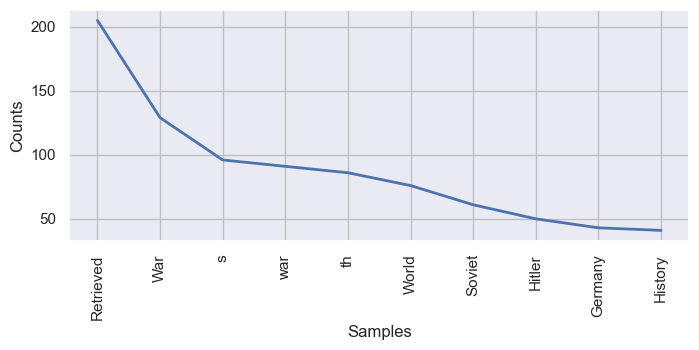

In [18]:
# Frequency distribution plot
plt.figure(figsize = (8, 3))
dist_words_filter_2.plot(10, cumulative = False)
plt.show()

#### The frequency distribution after removing stop words and punctuation marks becomes more descriptive of the contents of the wiki page.

#### The word 'war' is so common that it shows up in the top 10 words in both its upper case and lower case form. We could consider putting everything in lower case to avoid this, however it could cause issues later with identifying countries or potentially proper nouns.

#### I was somewhat surprised to see 'Retrieved' as the second most common word. Names of countries and leaders, as well as the word 'war', are not surprising when talking about historical events. I likley would not have been able to guess the word 'retrieved' would be in the top ten words, however it does seem logical.

## POS Tags with TextBlob

In [19]:
# First look at top 30 most common words in our working list
dist_words_filter_2.most_common(30)

[('Retrieved', 205),
 ('War', 129),
 ('s', 96),
 ('war', 91),
 ('th', 86),
 ('World', 76),
 ('Soviet', 61),
 ('Hitler', 50),
 ('Germany', 43),
 ('History', 41),
 ('world', 39),
 ('www', 39),
 ('ISBN', 39),
 ('first', 38),
 ('century', 36),
 ('Japanese', 36),
 ('would', 35),
 ('German', 34),
 ('edit', 33),
 ('Japan', 33),
 ('Germans', 32),
 ('New', 31),
 ('Union', 31),
 ('II', 30),
 ('United', 30),
 ('S', 30),
 ('ISSN', 30),
 ('Europe', 29),
 ('also', 29),
 ('became', 27)]

In [20]:
# List additional new stop words
new_stopwords = ['s', 'th', 'www', 'ISBN', 'would', 'S', 'ISSN']

In [21]:
# Remove additional new stop words
filtered = []
for word in tokenized_word_2:
    if word not in new_stopwords:
        filtered.append(word)

In [22]:
# Remove quotation marks around words
clean_text = re.sub(r"'", "", str(filtered))

In [23]:
clean_text[:25]

'[Key, events, century, Wi'

In [24]:
%%time
text = TextBlob(str(clean_text))

CPU times: user 3.76 ms, sys: 256 µs, total: 4.02 ms
Wall time: 8.22 ms


In [25]:
tags_list = list(text.tags)

In [26]:
tags_list[:5]

[('[', 'NN'),
 ('Key', 'NNP'),
 ('events', 'NNS'),
 ('century', 'NN'),
 ('WikipediaJump', 'NNP')]

In [27]:
# Convert tags list to df
df_text = pd.DataFrame(tags_list)
df_text.columns = ['Words', 'Word type']

In [28]:
df_text.head()

Words Word type
0              [        NN
1            Key       NNP
2         events       NNS
3        century        NN
4  WikipediaJump       NNP

In [29]:
# Group by word type
df_t = df_text.groupby('Word type').count().reset_index()

In [30]:
df_t.head()

Word type  Words
0        CC      2
1        CD     61
2        DT     33
3        FW     13
4        IN     90

In [31]:
# Top 10 POS tags
top10 = df_t.nlargest(10, 'Words')

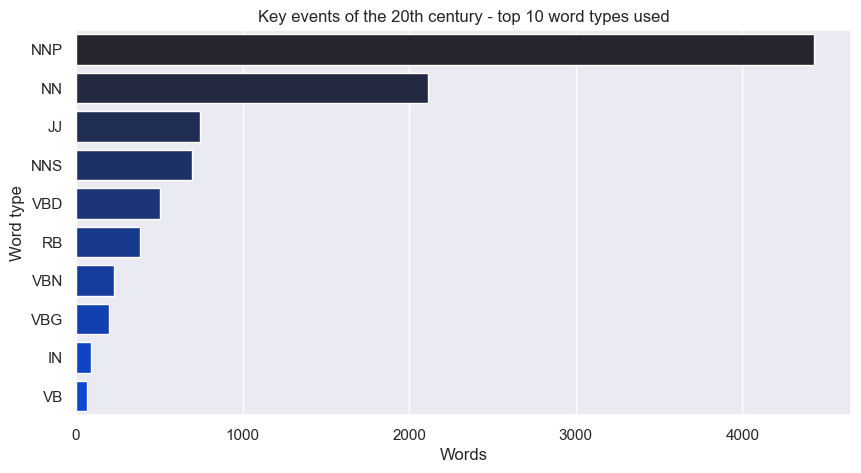

In [32]:
# Plot top 10 POS tags
plt.figure(figsize = (10, 5))
with sns.dark_palette('xkcd:blue', 10):
    sns.barplot(x = 'Words', y = 'Word type',
    saturation = 0.9, data = top10).set_title('Key events of the 20th century - top 10 word types used')

In [33]:
# Look at nouns only
df = df_text[(df_text['Word type'] == 'NN') | (df_text['Word type'] == 'NNS') | (df_text['Word type'] == 'NNP')]
df.columns = ['Word', 'Occurences']
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending = False)
top15 = y.nlargest(15, 'Occurences')

In [34]:
top15

Word  Occurences
1268  Retrieved         204
1593        War         129
2928        war          91
1638      World          76
682      Hitler          50
1392     Soviet          47
603     Germany          43
680     History          41
2952      world          39
1841    century          36
781       Japan          33
2037       edit          33
1549      Union          31
1066        New          31
1550     United          30

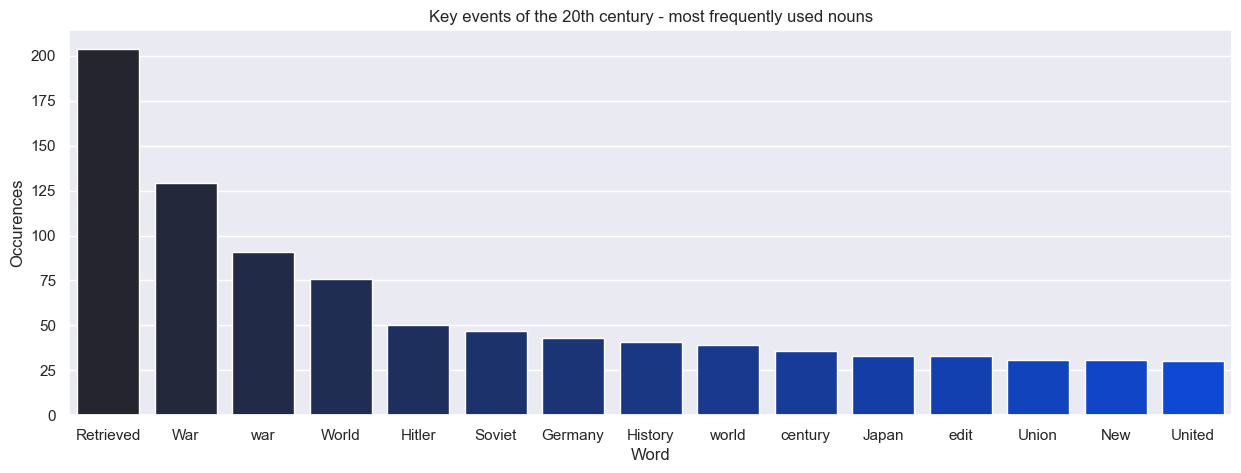

In [35]:
plt.figure(figsize = (15, 5))
with sns.dark_palette('xkcd:blue', 15):
    sns.barplot(x = 'Word', y = 'Occurences',
    saturation = 0.9, data = top15).set_title('Key events of the 20th century - most frequently used nouns')

#### The frequency of the word 'war' definitely stands out (and the absence of the word 'peace'). I suspect this might contribute to a more negative sentiment analysis. Words like 'Soviet' and 'Hitler' and 'German'/'Germans' stand out and lead me to believe that World War 2 was one of the biggest events of the 20th century.

#### It looks like 'retrieved' was incorrectly labeled a noun, and would require further investiagtion to uncover root cause.

In [36]:
# Look at verbs only
df = df_text[(df_text['Word type'] == 'VB')  | (df_text['Word type'] == 'VBD')]
df.columns = ['Word', 'Occurences']
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending = False)
top15 = y.nlargest(15, 'Occurences')

In [37]:
top15

Word  Occurences
38        became          27
40         began          13
166          led          13
51          came          12
282         used           8
164     launched           8
276         took           7
268  surrendered           7
278       turned           7
71    controlled           7
141         held           6
113        ended           6
56       changed           6
264     suffered           6
217      refused           5

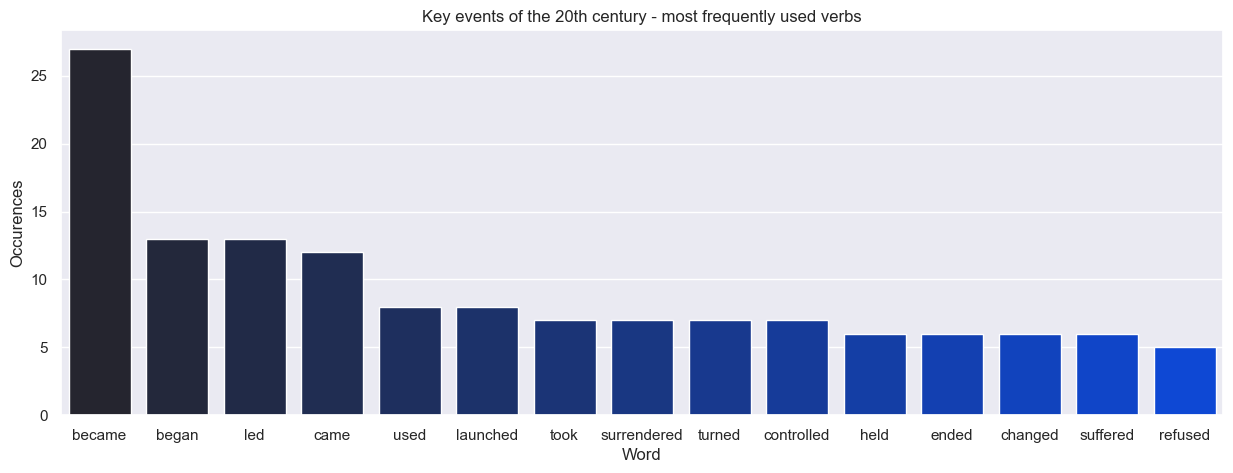

In [38]:
plt.figure(figsize = (15, 5))
with sns.dark_palette('xkcd:blue', 15):
    sns.barplot(x = 'Word', y = 'Occurences',
    saturation = 0.9, data = top15).set_title('Key events of the 20th century - most frequently used verbs')

#### The word 'Retrieved' stands out as it is by far the most frequently used verb. Retrieve can mean recover, rescue, win back, etc. which all make sense in the context of international relations and war. The word 'United' stands out as the second most frequently used verb, however this might be referring to The United States rather than the verb 'united'. This could be worth investigating further, especially if we want to perform a sentiment analysis since the verb 'united' is a rather positive one.

In [39]:
# Look at adjectives only
df = df_text[df_text['Word type'] == 'JJ']
df.columns = ['Word', 'Occurences']
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending = False)
top15 = y.nlargest(15, 'Occurences')

In [40]:
top15

Word  Occurences
11    Japanese          27
194    nuclear          26
188        new          22
8       German          20
171       many          19
17      Soviet          14
84    economic          12
169      major          11
248    several          10
202   original          10
176   military           9
189       next           9
244     second           8
153       last           8
197  offensive           8

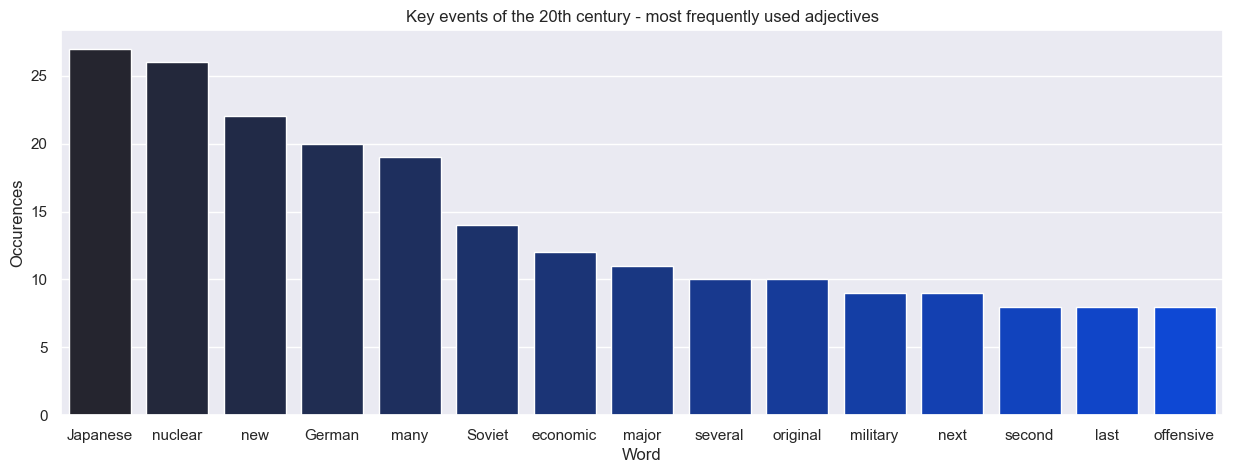

In [41]:
plt.figure(figsize = (15, 5))
with sns.dark_palette('xkcd:blue', 15):
    sns.barplot(x = 'Word', y = 'Occurences',
    saturation = 0.9, data = top15).set_title('Key events of the 20th century - most frequently used adjectives')

#### All of the nationalities stand out first thing. This is not surprising as the text is about key world events. 'Political' is the most frequent adjective that is not a nationality, and it definitely fits the theme of key world events. Words like 'Brian' and 'These' are not adjectives, but for the most part these POS tags appear to be very accuracte.

## Counting Country Occurances

In [42]:
listToStr = ' '.join([str(elem) for elem in filtered])
 
print(listToStr[:25])

Key events century Wikipe


In [43]:
# Create a count for all words
all_counts = Counter(re.sub(r'\W+', ' ', listToStr).split())

In [44]:
# Get country list
countries = pd.read_csv('countries_list_20th_century_1.5.csv', index_col = 0)

In [45]:
# Check
countries.head()

country_name
1   Afghanistan 
2       Albania 
3       Algeria 
4       Andorra 
5        Angola

In [46]:
# Get list from df
country_list = countries['country_name'].to_list()

In [47]:
# Remove spaces before and after country names
country_list_clean = [s.strip() for s in country_list]

In [48]:
# Count country occurances
dict_of_counts = {d : all_counts[d] for d in country_list_clean}

In [49]:
# Search for the names from the list in the dictionary and put into df
dct = {v:[k] for v,k in dict_of_counts.items()}  
df = pd.DataFrame(dct)

In [50]:
# Check
df

Afghanistan  Albania  Algeria  Andorra  Angola  Antigua and Barbuda  \
0            1        2        1        0       1                    0   

   Argentina  Armenia  Australia  Austria  ...  Donetsk People's Republic  \
0          0        0          2        5  ...                          0   

   Kosovo  Luhansk People's Republic  Niue  Northern Cyprus  \
0       0                          0     0                0   

   Sahrawi Arab Democratic Republic  Somaliland  South Ossetia  Taiwan  \
0                                 0           0              0       0   

   Transnistria  
0             0  

[1 rows x 208 columns]

In [51]:
df = df.transpose().reset_index()

In [52]:
df.dtypes

index    object
0         int64
dtype: object

In [53]:
df

index  0
0                         Afghanistan  1
1                             Albania  2
2                             Algeria  1
3                             Andorra  0
4                              Angola  1
..                                ... ..
203  Sahrawi Arab Democratic Republic  0
204                        Somaliland  0
205                     South Ossetia  0
206                            Taiwan  0
207                      Transnistria  0

[208 rows x 2 columns]

In [54]:
df.rename(columns = {'index': 'Country', 0: 'Times mentioned'}, inplace = True)

In [55]:
df

Country  Times mentioned
0                         Afghanistan                1
1                             Albania                2
2                             Algeria                1
3                             Andorra                0
4                              Angola                1
..                                ...              ...
203  Sahrawi Arab Democratic Republic                0
204                        Somaliland                0
205                     South Ossetia                0
206                            Taiwan                0
207                      Transnistria                0

[208 rows x 2 columns]

In [56]:
df.shape

(208, 2)

In [57]:
# Filter to show countries mentioned over 2 times
df_filtered = df[df['Times mentioned'] > 2]

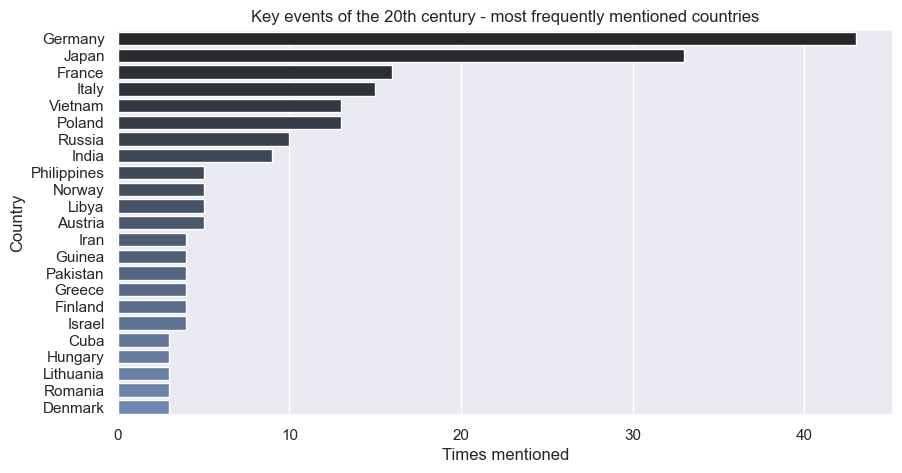

In [58]:
plt.figure(figsize = (10, 5))
with sns.dark_palette('#79C', 27):
    sns.barplot(x = 'Times mentioned', y = 'Country',
    saturation = 0.9, data = df_filtered.sort_values('Times mentioned', ascending = False)).set_title('Key events of the 20th century - most frequently mentioned countries')

#### The first thing I notice is that Germany is mentioned the most times. This aligns with looking at the most frequent nouns earlier where there were a lot of nouns relating to World War 2.

#### It is also noteworthy that the United States is not on this list. Likely the words got separated. Perhaps in the very beginning we could replace common variations of the US (e.g. 'the united states' and 'US') with one word like 'America' and that would more accurately capture the most frequently mentioned countries. A similar approach could be taken for the United Kingdom.

#### Also in our list of countries, 'China, People's Republic of', 'Korea, North', and 'Korea, South' are written in this format that most likely would not match how they appear in our data. In this case it would be easier to replace them in our dataframe of countries.